In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
import Demand
import Date

In [3]:
# x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
# color1 = 'maroon'
# color2 = 'dodgerblue'
# fig, ax = plt.subplots(2,2,sharey=True,sharex=True,figsize=[13,7])

# ax[0,0].step(x, T['TESA Int Gen - Lighting(weekday)'],color=color1, label='weekday', alpha = 5)
# ax[0,0].step(x, T['TESA Int Gen - Lighting(weekend)'],color=color2, label='weekend')
# ax[0,0].set_ylabel('(kWh)')
# ax[0,0].legend()
# ax[0,0].title.set_text('Lighting')
# ax[0,0].spines['top'].set_visible(False)
# ax[0,0].spines['right'].set_visible(False)

# ax[0,1].step(x, T['TESA Int Gen - Occupants(weekday)'],color=color1, label='weekday')
# ax[0,1].step(x, T['TESA Int Gen - Occupants(weekend)'],color=color2, label='weekend')
# ax[0,1].legend()
# ax[0,1].title.set_text('Occupants')
# ax[0,1].spines['top'].set_visible(False)
# ax[0,1].spines['right'].set_visible(False)

# ax[1,0].step(x, T['TESA Int Gen - Monitors(weekday)']+T['TESA Int Gen - Computers(weekday)'],color=color1, label='weekday')
# ax[1,0].step(x, T['TESA Int Gen - Monitors(weekend)']+T['TESA Int Gen - Computers(weekend)'],color=color2, label='weekend')
# ax[1,0].set_xticks((0,5,11,17,23))
# ax[1,0].set_xticklabels(('00:00','06:00','12:00','18:00','23:00'))
# ax[1,0].set_xlabel('time throughout the day')
# ax[1,0].set_ylabel('(kWh)')
# ax[1,0].legend()
# ax[1,0].title.set_text('Monitors + Computers')
# ax[1,0].spines['top'].set_visible(False)
# ax[1,0].spines['right'].set_visible(False)

# ax[1,1].step(x, T['TESA Total Int Gen - weekday'],color=color1,label='weekday')
# ax[1,1].step(x, T['TESA Total Int Gen - weekend'],color=color2, label='weekend')
# ax[1,1].set_xlabel('time throughout the day')
# ax[1,1].legend()
# ax[1,1].title.set_text('Total')
# ax[1,1].spines['top'].set_visible(False)
# ax[1,1].spines['right'].set_visible(False)

# # fig.suptitle('Time throughout the day', y=0)
# # fig.ylabel('Internal Generation (kW)')
# # fig.ylabel('Time throughout the day')

In [4]:
heating = np.zeros([24,31])
cooling = np.zeros([24,31])
HEAT = Demand.getHEATdemand(1)
COOL = Demand.getCOOLdemand(1)

In [5]:
jan_heating = np.zeros([24,32])
jan_cooling = np.zeros([24,32])


for q in range(0,32):
    HEAT = Demand.getHEATdemand(q+1)
    COOL = Demand.getCOOLdemand(q+1)

    for n in range(0,24):
        jan_heating[n,q] = HEAT.iloc[n]
        jan_cooling[n,q] = COOL.iloc[n]
        


In [6]:
ja_h_a = np.sum(jan_heating, axis=1)*1/31
ja_c_a = np.sum(jan_cooling, axis=1)*1/31


In [7]:
jul_heating = np.zeros([24,32])
jul_cooling = np.zeros([24,32])


for q in range(182,214):
    HEAT = Demand.getHEATdemand(q-31)
    COOL = Demand.getCOOLdemand(q-31)

    for n in range(0,24):
        jul_heating[n,q-182] = HEAT.iloc[n]
        jul_cooling[n,q-182] = COOL.iloc[n]

In [8]:
ju_h_a = np.sum(jul_heating, axis=1)*1/31
ju_c_a = np.sum(jul_cooling, axis=1)*1/31

In [9]:
ju_h_a = np.append(ju_h_a,ju_h_a[23])
ju_c_a = np.append(ju_c_a,ju_c_a[23])
ja_h_a = np.append(ja_h_a,ja_h_a[23])
ja_c_a = np.append(ja_c_a,ja_c_a[23])

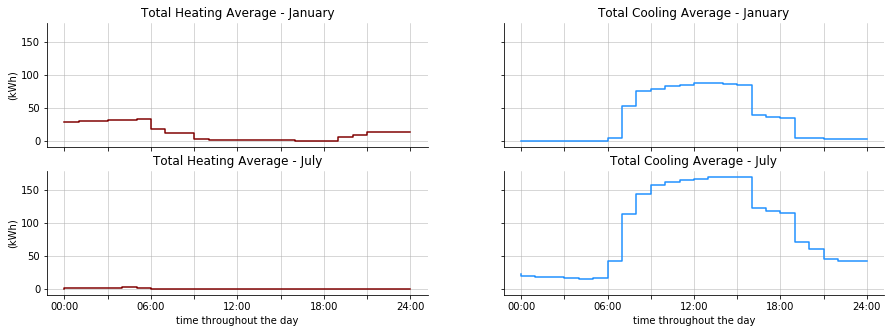

In [10]:
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
color1 = 'maroon'
color2 = 'dodgerblue'

fig, ax = plt.subplots(2,2,sharey=True, sharex=True,figsize=[15,5])

ax[0,0].step(x, ja_h_a, label='heating average - january', color=color1)
ax[0,0].title.set_text('Total Heating Average - January')
ax[0,0].set_ylabel('(kWh)')
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].grid(lw=0.5)

ax[0,1].step(x, ja_c_a, label='cooling average - january', color=color2)
ax[0,1].title.set_text('Total Cooling Average - January')
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].grid(lw=0.5)

ax[1,0].step(x, ju_h_a, label='heating average - july', color=color1)
ax[1,0].title.set_text('Total Heating Average - July')
ax[1,0].set_xticks((0,3,6,9,12,15,18,21,24))
ax[1,0].set_xticklabels(('00:00','','06:00','','12:00','','18:00','','24:00'))
ax[1,0].set_xlabel('time throughout the day')
ax[1,0].set_ylabel('(kWh)')
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].grid(lw=0.5)

ax[1,1].step(x, ju_c_a, label='cooling average - july', color=color2)
ax[1,1].title.set_text('Total Cooling Average - July')
ax[1,1].set_xlabel('time throughout the day')
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].grid(lw=0.5)
